In [23]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input, Concatenate, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [25]:
# import dataset
df = pd.read_excel('newDataS7.xlsx')
df.head()

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Target
0,2,1,1,15,19,1
1,1,2,1,16,18,1
2,2,1,0,14,20,1
3,1,2,1,19,18,1
4,1,2,1,10,15,1


##### Initial Analysis

In [26]:
# check for missing values
df.isnull().sum()

Year of Income          0
Career                  0
Gender                  0
Qualified Practice 1    0
Partial Task            0
Target                  0
dtype: int64

In [27]:
# check missing percentage
df.isnull().sum()/df.shape[0]*100

Year of Income          0.0
Career                  0.0
Gender                  0.0
Qualified Practice 1    0.0
Partial Task            0.0
Target                  0.0
dtype: float64

Since its less than 1 percent, we can drop the rows with missing values.

In [28]:
# drop missing values
df.dropna(inplace=True)

In [29]:
# check duplicates
df.duplicated().sum()

3205

In [30]:
# check data types
df.dtypes

Year of Income          int64
Career                  int64
Gender                  int64
Qualified Practice 1    int64
Partial Task            int64
Target                  int64
dtype: object

In [31]:
# convert year to categorical
df['Year of Income'] = df['Year of Income'].astype('object')

In [32]:
# check number of unique values
df.nunique()

Year of Income           3
Career                   3
Gender                   2
Qualified Practice 1    21
Partial Task            10
Target                   2
dtype: int64

We see ID is a unique identifier for each row. We can drop it as it does not add any value to our analysis. We will also drop Output Feature 2 as we are not going to use it in our analysis.

##### Univariate Analysis of Numerical Features

Feature Name: Career
Mean: 1.0163752428531778
Median: 1.0
Standard Deviation: 0.3063432027590359
Minimum: 0
Maximum: 2
Skewness: 0.40946175518131084
Kurtosis: 7.59668030015221


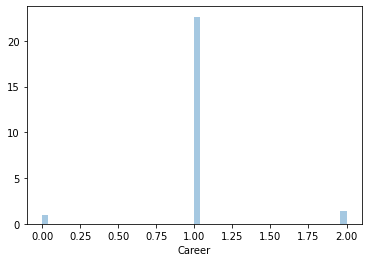

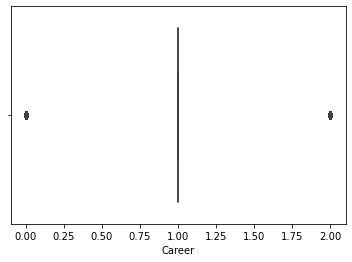

----------------------------------------
Feature Name: Gender
Mean: 0.9728004440743825
Median: 1.0
Standard Deviation: 0.1626870797876741
Minimum: 0
Maximum: 1
Skewness: -5.8156190234944996
Kurtosis: 31.839097980658206


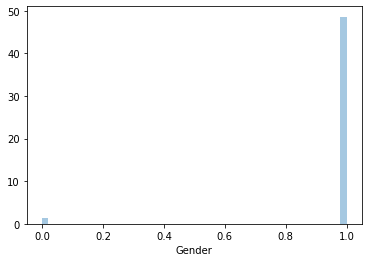

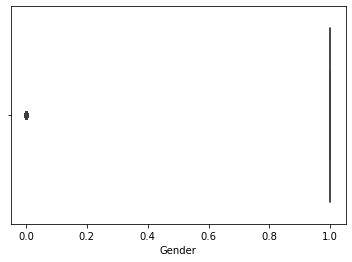

----------------------------------------
Feature Name: Qualified Practice 1
Mean: 2.343880099916736
Median: 0.0
Standard Deviation: 5.379824644235541
Minimum: 0
Maximum: 20
Skewness: 2.322803127748021
Kurtosis: 4.023003947612734


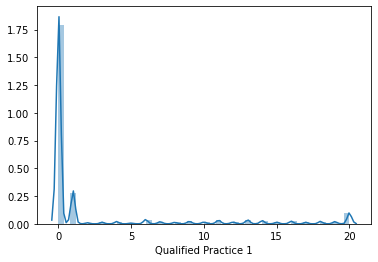

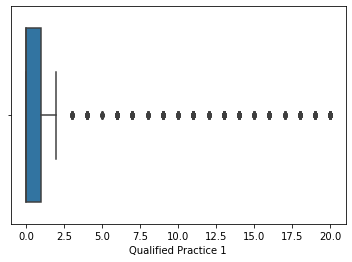

----------------------------------------
Feature Name: Partial Task
Mean: 3.942825423258396
Median: 1.0
Standard Deviation: 6.686196634906814
Minimum: 0
Maximum: 20
Skewness: 1.6740667431749134
Kurtosis: 0.884949152819297


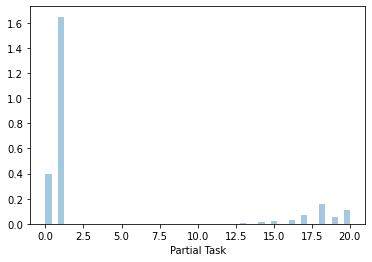

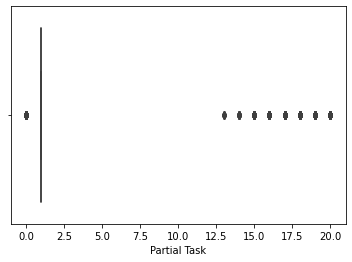

----------------------------------------
Feature Name: Target
Mean: 0.5253955037468776
Median: 1.0
Standard Deviation: 0.4994239634087115
Minimum: 0
Maximum: 1
Skewness: -0.10175566373976819
Kurtosis: -1.99075114526281


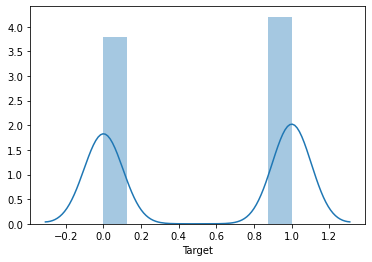

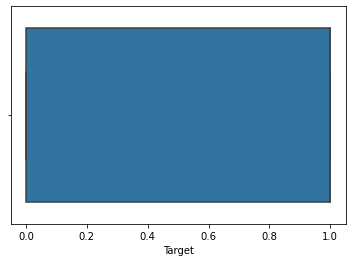

----------------------------------------


In [33]:
# Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print('Feature Name:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    print('Skewness:', df[col].skew())
    print('Kurtosis:', df[col].kurtosis())
    sns.distplot(df[col], kde=True)
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print('----------------------------------------')

Observations:
- Qualififed Practice 1 and 2 seems normally distributed with no presence of outliers.
- Partial Task seems negatively skewed with presence of outliers. This indicate more students tend to achieve higher scores.
- Midterm Exam seems normally distributed with no presence of outliers.
- Final Task seems negatively skewed but no presence of outliers can be observed.
- Participation in Class seems negatively skewed with presence of outliers. A high number of students can be observed with next to zero participation.
- Final Exam seems normally distributed with no presence of outliers.
- Linguistic Comprehension and Mathematics seems negatively skewed with presence of outliers.
- Output is normally distributed with no outliers.

##### Univariate Analysis of Categorical Features

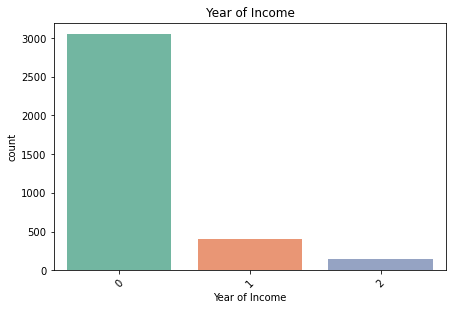

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns

plot_count = 1
plt.figure(figsize = (12,8))
for col in cat_cols:
    plt.subplot(2, 2, plot_count)
    plt.gca().set_title(col)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plot_count += 1
plt.tight_layout()
plt.show()

Observations:
- Imbalanced distribution for Year of Income and Sex.
- Target Variable, i.e., Output Feature 1 is balanced.

##### Multivariate Analysis of Categorical Features

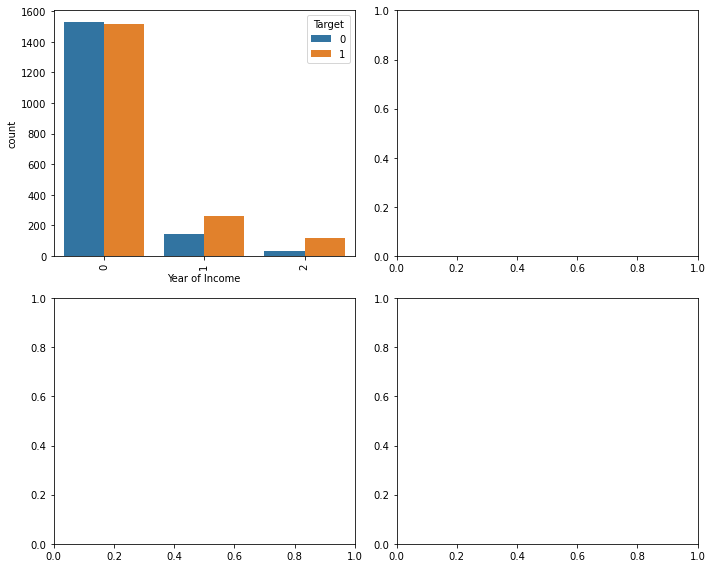

In [35]:
# check bar plots of all categorical variables with target variable
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# make plots
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(x=variable, data=df, hue='Target', ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

##### Multivariate Analysis of Numerical Features

In [18]:
# label encode target variable using map
#df['Target'] = df['Target'].map({'Disapproved': 0, 'Approved': 1})

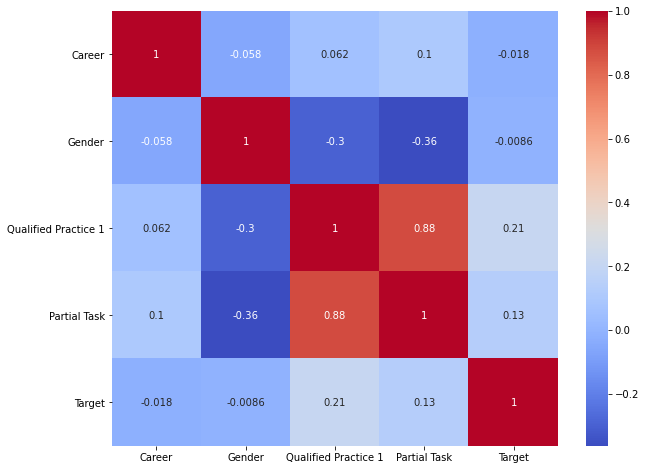

In [36]:
# correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [38]:
# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [39]:
df

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Target
0,2,1,1,15,19,1
1,1,2,1,16,18,1
2,2,1,0,14,20,1
3,1,2,1,19,18,1
4,1,2,1,10,15,1
...,...,...,...,...,...,...
3598,2,1,1,16,18,1
3599,1,1,0,5,18,0
3600,1,1,1,7,17,0
3601,1,1,1,20,18,1


In [40]:
# seperate 20% of data for testing
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
X_train.shape, X_test.shape

((2882, 5), (721, 5))

In [22]:
# scale data
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [23]:
# SMOTE
#smote = SMOTE(sampling_strategy={1: 1000, 0: 1000}, random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
# check new training data
print(X_train.shape, y_train.shape)

(2882, 5) (2882,)


In [43]:
# verify test data shape
print(X_test.shape, y_test.shape)

(721, 5) (721,)


##### **Models Testing (Cross Validation)**

In [44]:
# results_df to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [45]:
# function to do cv and return mean scores
def cv_scores(model_name, model):

    # define cv
    kf = KFold(n_splits=5)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X_train, y_train):
        print('Starting fold...')
        
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        
        
        #X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        #y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        recall_scores.append(recall_score(y_test_cv, y_pred))
        precision_scores.append(precision_score(y_test_cv, y_pred))
        f1_scores.append(f1_score(y_test_cv, y_pred))
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [46]:
# models to test
models_dict = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1)
}

In [47]:
# evaluate models
for model_name, model in models_dict.items():
    cv_scores(model_name, model)
   

Evaluating Decision Tree model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Random Forest model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Logistic Regression model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Support Vector Machine model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating K Nearest Neighbors model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [48]:
# Function to create a Keras model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #print(model.summary())
    return model

# Function to do cv and return mean scores
def cv_scores_keras(model_name, X, y, epochs=20, batch_size=32):

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_model(input_shape=(X_train.shape[1],), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [49]:
# evaluate DNN
cv_scores_keras('Keras DNN', X_train, y_train)

Evaluating Keras DNN model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [50]:
# Function to create an LSTM Keras model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #print(model.summary())
    return model

# Function to do cv and return mean scores
def cv_scores_keras_lstm(model_name, X, y, epochs=20, batch_size=32):

    # Reshape input data for LSTM (samples, timesteps, features)
    #X = X.values.reshape(X.shape[0], X.shape[1], 1)
 

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]


In [51]:
# evaluate LSTM
cv_scores_keras_lstm('Keras LSTM', X_train, y_train)

Evaluating Keras LSTM model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [52]:
# check results of CV evaluation
results_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
5,Keras DNN,0.709,0.775,0.709,0.695
4,K Nearest Neighbors,0.707,0.858,0.607,0.676
1,Random Forest,0.719,0.930,0.504,0.653
3,Support Vector Machine,0.710,0.893,0.510,0.648
0,Decision Tree,0.719,0.947,0.494,0.648
6,Keras LSTM,0.675,0.750,0.675,0.647
2,Logistic Regression,0.611,0.672,0.505,0.576


##### **Hold-Out Set Evaluation**

In [35]:
# function to evaluate on hold out set and create confusion matrix of a model
def plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test):

    # fit model
    model.fit(X_train, y_train)

    # predict classes
    y_pred = model.predict(X_test)

    # scores
    print(f'\n\nModel Name: {model_name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')

    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()



Model Name: Decision Tree
Accuracy: 0.7969924812030075
Precision: 0.9
Recall: 0.7912087912087912
F1 Score: 0.8421052631578948


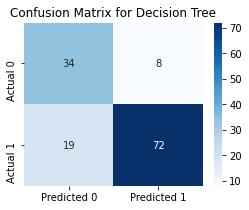



Model Name: Random Forest
Accuracy: 0.8195488721804511
Precision: 0.8941176470588236
Recall: 0.8351648351648352
F1 Score: 0.8636363636363636


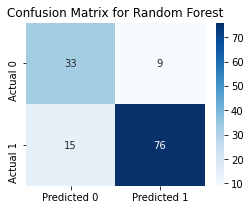



Model Name: Logistic Regression
Accuracy: 0.7744360902255639
Precision: 0.8144329896907216
Recall: 0.8681318681318682
F1 Score: 0.8404255319148937


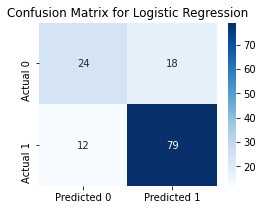



Model Name: Support Vector Machine
Accuracy: 0.7443609022556391
Precision: 0.7821782178217822
Recall: 0.8681318681318682
F1 Score: 0.8229166666666666


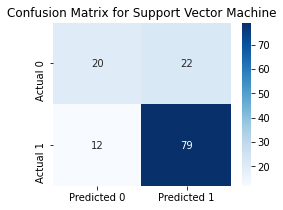



Model Name: K Nearest Neighbors
Accuracy: 0.8045112781954887
Precision: 0.8350515463917526
Recall: 0.8901098901098901
F1 Score: 0.8617021276595744


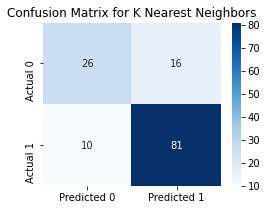

In [36]:
# plot confusion matrix for all models
for model_name, model in models_dict.items():
    plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test)



Model Name: Keras DNN
Accuracy: 0.7293233082706767
Precision: 0.7669902912621359
Recall: 0.8681318681318682
F1 Score: 0.8144329896907215


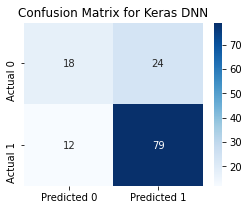

In [37]:
# DNN model
model = create_model(input_shape=(X_train.shape[1],), num_classes=2)

# train model
model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# scores
print(f'\n\nModel Name: Keras DNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras DNN')
plt.show()



Model Name: Keras LSTM
Accuracy: 0.7443609022556391
Precision: 0.7663551401869159
Recall: 0.9010989010989011
F1 Score: 0.8282828282828283


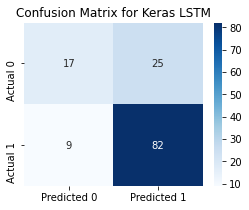

In [38]:
# LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=2)

# Reshape input data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.values.shape[0], X_train.values.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.values.shape[0], X_test.values.shape[1], 1)

# train model
lstm_model.fit(X_train_reshaped, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis=-1)

# scores
print(f'\n\nModel Name: Keras LSTM')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras LSTM')
plt.show()
